# Binning

# 1.Equal-Width Binning(Distance Binning):
- Equal-Width Binning divides the entire range of a continuous variable into a fixed number of bins, where is each bin has the same width(Distance)
- This method does not consider how data is distributed inside the range. It only focuses on the minimum and maximum values.
#### Formulae:
 - Bin Width = (max-min)/k
#### Example:
- [18,22,25,30,35,40,45,50]

min=18
max=50
k=4
Where, k= number of Bins

Bin_Width= (50-18)/4 = 32/4 = 8
Bins:
 - 18-26
 - 26-34
 - 34-42
 - 42-50
### Key Points:
- Count difference
- Range Same

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.DataFrame({
    "age":[18,22,25,30,35,40,45,50]
})
data

,age
0,18
1,22
2,25
3,30
4,35
5,40
6,45
7,50


# Equal-Width

In [6]:
data["age_bin"]= pd.cut(data["age"], bins=3)
data

,age,age_bin
0,18,"(17.968, 28.667]"
1,22,"(17.968, 28.667]"
2,25,"(17.968, 28.667]"
3,30,"(28.667, 39.333]"
4,35,"(28.667, 39.333]"
5,40,"(39.333, 50.0]"
6,45,"(39.333, 50.0]"
7,50,"(39.333, 50.0]"


<function matplotlib.pyplot.show(close=None, block=None)>

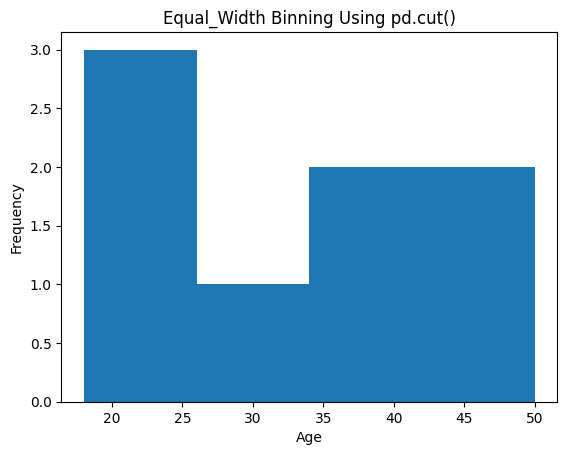

In [7]:
plt.hist(data["age"], bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

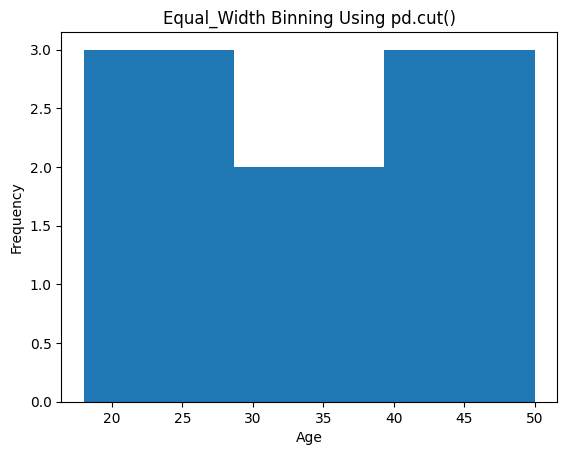

In [8]:
plt.hist(data["age"], bins=3)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Width Binning Using pd.cut()")
plt.show

# 2.Equal-Frequency Binning(Quantile Binning):
Equal-Frequency Binning divides the data into bins contains approximately the same number of observations.
This methods uses data distribution and is based on quantiles(Percentails).
Formulae:
Total Observations = n

Number of bins = k

Observations per bin:
  -   n/k

Examples:
[18,22,25,30,35,40,45,50]

Observations per bin:
  -  8/4 = 2

Bins:
- First 2 Values -> Bin 1
- Next 2 values -> Bin 2
- Next 2 values -> Bin 3
- Next 2 values -> Bin 4
#### Key Points:
 - Count Same
 - Range Difference

In [9]:
bin_min=data["age"].groupby(data["age_bin"]).max()
bin_min

C:\Users\kk397_ymf0gi0\AppData\Local\Temp\ipykernel_17760\3043064599.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).max()


age_bin
(17.968, 28.667]    25
(28.667, 39.333]    35
(39.333, 50.0]      50
Name: age, dtype: int64

In [10]:
bin_min=data["age"].groupby(data["age_bin"]).min()
bin_min

C:\Users\kk397_ymf0gi0\AppData\Local\Temp\ipykernel_17760\2778510122.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).min()


age_bin
(17.968, 28.667]    18
(28.667, 39.333]    30
(39.333, 50.0]      40
Name: age, dtype: int64

In [11]:
bin_min=data["age"].groupby(data["age_bin"]).mean()
bin_min

C:\Users\kk397_ymf0gi0\AppData\Local\Temp\ipykernel_17760\2188877164.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_min=data["age"].groupby(data["age_bin"]).mean()


age_bin
(17.968, 28.667]    21.666667
(28.667, 39.333]    32.500000
(39.333, 50.0]      45.000000
Name: age, dtype: float64

# Custom/domain-based binning:
- Custom Binning uses predefined bin boundaries based on domain knowledge,business rules, or external standards.
- This method is not data-driven, but context-driven

### Example (Age Groups)
Bins:
- 18-25 -> Young
- 25-60 -> Adult
- 60-100 ->Senior

-These boundaries come from real-world meaning, not calculations.

In [12]:
custom_bins=[17,25,35,50]
labels=["Young","Adult","Senior"]
bins=pd.cut(data["age"],bins=custom_bins, labels=labels)
bins

0     Young
1     Young
2     Young
3     Adult
4     Adult
5    Senior
6    Senior
7    Senior
Name: age, dtype: category
Categories (3, object): ['Young' < 'Adult' < 'Senior']

<function matplotlib.pyplot.show(close=None, block=None)>

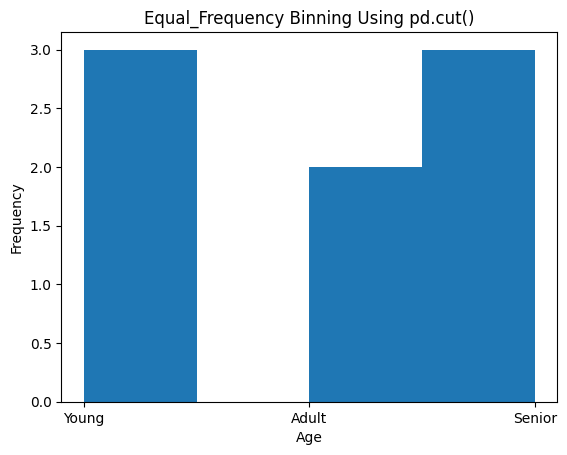

In [13]:
plt.hist(bins, bins=4)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Equal_Frequency Binning Using pd.cut()")
plt.show